In [20]:
import pandas as pd
import numpy as np

#load data
train_path = "/content/drive/My Drive/Colab Notebooks/CS229/ps1/data/ds4_train.csv"
eval_path = "/content/drive/My Drive/Colab Notebooks/CS229/ps1/data/ds4_valid.csv"

In [21]:
train = pd.read_csv(train_path)
X_train = train.copy().drop(axis=1, columns=["y"])
y_train = train["y"]

eval = pd.read_csv(eval_path)
X_eval = eval.copy().drop(axis=1, columns=["y"])
y_eval = eval["y"]

In [22]:
class PoissonRegression(object):
    def __init__(self, theta=None):
        self.theta = None

    def fit(self, X, y, max_iter=1000000, alpha=1e-7, eps=1e-5):    
       
        m, n = X.shape
        
        # starting theta = 0
        if self.theta is None:
            self.theta = np.zeros(n)

        #function g      
        g = lambda X: np.exp(X)

        # update theta
        for i in range(max_iter):
            theta = self.theta

            #grad
            grad = (1/m)*(y-g(X.dot(theta))).dot(X)
            
            #update rule
            self.theta = theta + alpha*grad
            
            # if norm is small, then break
            if np.linalg.norm(self.theta - theta, ord=1) < eps:
                break

    def predict(self, X):
        g = lambda X: np.exp(X)
        preds = g(X.dot(self.theta))
        return preds

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#train a logistic regression classifier
model = PoissonRegression()
model.fit(X_train.to_numpy(), y_train.to_numpy())
model.theta

array([11.2993503 , 10.7993319 ,  2.00025994,  4.40057538])

In [27]:
# Plot decision boundary on top of validation set 
y_pred = model.predict(X_eval.to_numpy())
y_pred

array([12006359.86581353,  2830304.03579432, 20532139.36094924,
        1606325.27893837,   478492.93939296,  5704208.27498165,
         688780.93387403,   482251.40578825,  1907783.35462967,
         113304.57948076,  4191733.19094257,   496433.05205191,
        4190066.40831753,  1847737.0471228 ,   146332.4554155 ,
        1168041.06489932,  1589828.98611051,  3150426.35644967,
         407808.71464364,   123087.12545937,  2118074.66350594,
         118172.25972253,  1183542.42631491,  4787888.00051832,
         578719.01949917,  9577052.20950364,   409540.26168626,
        1099225.18372961,  1744305.12790711,  1470513.86534832,
         495006.08268733,  3469182.32255393,  5676085.60732279,
       24968671.65611927,   465047.97552258, 14631156.19304226,
         777431.47388821,  1288722.74312789,   454204.88329992,
       10176003.79318213,  2684865.66725433,  7236545.49222167,
         460004.46691636,   203662.53533839,  3453169.34961826,
       10849745.5704548 ,  6564002.79676

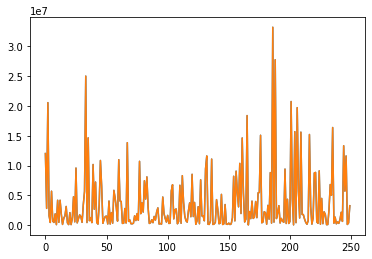

In [30]:
plt.plot(y_pred)
plt.show()

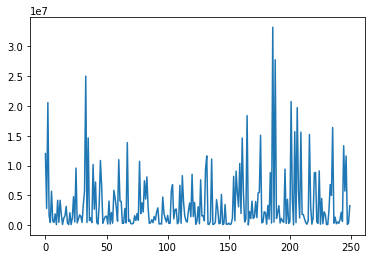

In [31]:
plt.plot(y_eval)
plt.show()

In [33]:
(y_eval-y_pred).sum()

6864.443627595698